# Kentucky Water Quality Analysis  
## Keystone Project — Week 1

This notebook documents the initial exploration, inspection, and early cleaning of EPA Safe Drinking Water Act (SDWA) violations data for Kentucky public water systems.

---

##  Working Notes 

Below are common checks when working with and exploring a dataset. Not all code will be used for final analysis.


## 1. Data Loading

The first step of this Keystone Project involved loading three datasets:
- SDWA violations
- Kentucky public water systems
- Contaminant reference codes

These datasets will all be needed to see the drinking water quality issues in Kentucky.


In [4]:
from pathlib import Path
import pandas as pd

project_root = Path("..")
data_folder = project_root / "datasets" / "SDWA_ky"

violations_path = data_folder / "ky_violations_enforcement.csv"
systems_path = data_folder / "ky_pub_water_systems.csv"
codes_path = data_folder / "ref_contaminant_codes.csv"

violations = pd.read_csv(violations_path, low_memory=False)
systems = pd.read_csv(systems_path, low_memory=False)
codes = pd.read_csv(codes_path, low_memory=False)

violations.head()



,SUBMISSIONYEARQUARTER,PWSID,VIOLATION_ID,FACILITY_ID,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,NON_COMPL_PER_BEGIN_DATE,NON_COMPL_PER_END_DATE,PWS_DEACTIVATION_DATE,VIOLATION_CODE,...,RULE_FAMILY_CODE,VIOL_FIRST_REPORTED_DATE,VIOL_LAST_REPORTED_DATE,ENFORCEMENT_ID,ENFORCEMENT_DATE,ENFORCEMENT_ACTION_TYPE_CODE,ENF_ACTION_CATEGORY,ENF_ORIGINATOR_CODE,ENF_FIRST_REPORTED_DATE,ENF_LAST_REPORTED_DATE
0,2025Q3,CA4600082,1102003,NaN,08/01/2011,08/31/2011,08/01/2011,08/31/2011,NaN,44,...,120.0,06/26/2013,11/20/2015,1202005,10/26/2011,SFL,Formal,S,06/26/2013,11/20/2015
1,2025Q3,CA4600082,1102003,NaN,08/01/2011,08/31/2011,08/01/2011,08/31/2011,NaN,44,...,120.0,06/26/2013,11/20/2015,9502003,02/01/2012,SOX,Resolving,S,03/28/2018,02/16/2021
2,2025Q3,CA4600082,302001,NaN,10/01/2002,10/31/2002,10/01/2002,10/31/2002,NaN,21,...,110.0,07/10/2004,11/20/2015,1002004,11/30/2002,SOX,Resolving,S,06/04/2010,11/20/2015
3,2025Q3,FL3424693,20130003421,NaN,01/01/2012,12/31/2012,01/01/2012,12/31/2012,NaN,03,...,330.0,02/19/2013,04/03/2016,376208,02/21/2013,SOX,Resolving,S,09/24/2013,04/03/2016
4,2025Q3,FL3535116,20160005292,NaN,01/01/2016,NaN,01/01/2016,06/30/2016,NaN,52,...,350.0,08/29/2016,05/21/2019,467995,06/30/2016,SOX,Resolving,S,03/15/2017,05/21/2019


## 2. Initial Data Inspection

After loading the data, I inspected the dataset and looked at size, structure, data types, and missing values. 


In [5]:
violations.shape


(136596, 38)

In [6]:
violations.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136596 entries, 0 to 136595
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SUBMISSIONYEARQUARTER         136596 non-null  object 
 1   PWSID                         136596 non-null  object 
 2   VIOLATION_ID                  115934 non-null  object 
 3   FACILITY_ID                   17379 non-null   float64
 4   COMPL_PER_BEGIN_DATE          115934 non-null  object 
 5   COMPL_PER_END_DATE            105922 non-null  object 
 6   NON_COMPL_PER_BEGIN_DATE      115934 non-null  object 
 7   NON_COMPL_PER_END_DATE        115934 non-null  object 
 8   PWS_DEACTIVATION_DATE         47223 non-null   object 
 9   VIOLATION_CODE                115934 non-null  object 
 10  VIOLATION_CATEGORY_CODE       115934 non-null  object 
 11  IS_HEALTH_BASED_IND           115934 non-null  object 
 12  CONTAMINANT_CODE              115903 non-nul

## 3. Exploring Key Variables

I explored some key variables to see the types of violations including violation categories, health-based indicators, and severity measures.


In [7]:
violations["VIOLATION_CATEGORY_CODE"].value_counts(dropna=False).head(15)


VIOLATION_CATEGORY_CODE
MR       94371
NaN      20662
MCL      11306
Other     5892
TT        3456
MON        810
RPT         97
MRDL         2
Name: count, dtype: int64

In [8]:
violations["IS_HEALTH_BASED_IND"].value_counts(dropna=False)





IS_HEALTH_BASED_IND
N      101170
NaN     20662
Y       14764
Name: count, dtype: int64

In [9]:
violations["SEVERITY_IND_CNT"].describe()


count    5467.000000
mean        1.613316
std         0.910619
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: SEVERITY_IND_CNT, dtype: float64

## 4. Missing Data Assessment

SDWA datasets contain many fields that are only applicable to certain violation types. I looked at missing data patterns to see which columns may not be usable for analysis.


In [10]:
missing_counts = violations.isna().sum().sort_values(ascending=False)
missing_counts.head(15)


CORRECTIVE_ACTION_ID       136596
SAMPLE_RESULT_ID           136459
SEVERITY_IND_CNT           131129
UNIT_OF_MEASURE            127596
FACILITY_ID                119217
STATE_MCL                  110234
VIOL_MEASURE               109158
PWS_DEACTIVATION_DATE       89373
IS_MAJOR_VIOL_IND           54652
COMPL_PER_END_DATE          30674
ENF_ACTION_CATEGORY         22610
FEDERAL_MCL                 21803
CALCULATED_RTC_DATE         20733
CONTAMINANT_CODE            20693
VIOL_LAST_REPORTED_DATE     20681
dtype: int64

In [11]:
missing_percent = (violations.isna().mean() * 100).sort_values(ascending=False)
missing_percent.head(15)


CORRECTIVE_ACTION_ID       100.000000
SAMPLE_RESULT_ID            99.899704
SEVERITY_IND_CNT            95.997687
UNIT_OF_MEASURE             93.411227
FACILITY_ID                 87.277080
STATE_MCL                   80.700753
VIOL_MEASURE                79.913028
PWS_DEACTIVATION_DATE       65.428709
IS_MAJOR_VIOL_IND           40.009956
COMPL_PER_END_DATE          22.456002
ENF_ACTION_CATEGORY         16.552461
FEDERAL_MCL                 15.961668
CALCULATED_RTC_DATE         15.178336
CONTAMINANT_CODE            15.149053
VIOL_LAST_REPORTED_DATE     15.140268
dtype: float64

## 5. Data Cleaning and Wrangling

Basic cleaning and wrangling steps including checking for duplicates, filtering, sorting records, renaming columns, and converting dates to datetime format.


In [12]:
violations.duplicated().sum()


np.int64(0)

In [13]:
violations = violations.drop_duplicates()
violations.duplicated().sum()


np.int64(0)

In [14]:
health_violations = violations[violations["IS_HEALTH_BASED_IND"] == "Y"]
health_violations.shape


(14764, 38)

In [15]:
violations.sort_values("NON_COMPL_PER_BEGIN_DATE").head()


,SUBMISSIONYEARQUARTER,PWSID,VIOLATION_ID,FACILITY_ID,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,NON_COMPL_PER_BEGIN_DATE,NON_COMPL_PER_END_DATE,PWS_DEACTIVATION_DATE,VIOLATION_CODE,...,RULE_FAMILY_CODE,VIOL_FIRST_REPORTED_DATE,VIOL_LAST_REPORTED_DATE,ENFORCEMENT_ID,ENFORCEMENT_DATE,ENFORCEMENT_ACTION_TYPE_CODE,ENF_ACTION_CATEGORY,ENF_ORIGINATOR_CODE,ENF_FIRST_REPORTED_DATE,ENF_LAST_REPORTED_DATE
72112,2025Q3,KY0392416,988881,NaN,01/01/1978,12/31/1980,01/01/1978,12/31/1980,10/01/1981,03,...,330.0,03/27/1991,03/27/1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64674,2025Q3,KY0672475,1017281,NaN,01/01/1978,12/31/1980,01/01/1978,12/31/1980,08/01/2003,03,...,330.0,07/10/1990,03/27/1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100384,2025Q3,KY1022558,1049681,NaN,01/01/1978,12/31/1980,01/01/1978,12/31/1980,07/01/1982,03,...,330.0,03/27/1991,03/27/1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111143,2025Q3,KY0842839,2037882,NaN,01/01/1979,12/31/1981,01/01/1979,12/31/1981,10/01/1997,03,...,330.0,07/10/1990,03/27/1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87592,2025Q3,KY1170995,5631289,NaN,01/01/1981,12/31/1981,01/01/1981,12/31/1981,NaN,03,...,330.0,07/10/1990,03/27/1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
violations = violations.rename(columns={
    "NON_COMPL_PER_BEGIN_DATE": "noncompl_begin",
    "NON_COMPL_PER_END_DATE": "noncompl_end",
    "VIOLATION_CATEGORY_CODE": "violation_category",
    "IS_HEALTH_BASED_IND": "is_health_based",
    "CONTAMINANT_CODE": "contaminant_code",
    "PWSID": "pwsid"
})
violations.columns


Index(['SUBMISSIONYEARQUARTER', 'pwsid', 'VIOLATION_ID', 'FACILITY_ID',
       'COMPL_PER_BEGIN_DATE', 'COMPL_PER_END_DATE', 'noncompl_begin',
       'noncompl_end', 'PWS_DEACTIVATION_DATE', 'VIOLATION_CODE',
       'violation_category', 'is_health_based', 'contaminant_code',
       'VIOL_MEASURE', 'UNIT_OF_MEASURE', 'FEDERAL_MCL', 'STATE_MCL',
       'IS_MAJOR_VIOL_IND', 'SEVERITY_IND_CNT', 'CALCULATED_RTC_DATE',
       'VIOLATION_STATUS', 'PUBLIC_NOTIFICATION_TIER',
       'CALCULATED_PUB_NOTIF_TIER', 'VIOL_ORIGINATOR_CODE', 'SAMPLE_RESULT_ID',
       'CORRECTIVE_ACTION_ID', 'RULE_CODE', 'RULE_GROUP_CODE',
       'RULE_FAMILY_CODE', 'VIOL_FIRST_REPORTED_DATE',
       'VIOL_LAST_REPORTED_DATE', 'ENFORCEMENT_ID', 'ENFORCEMENT_DATE',
       'ENFORCEMENT_ACTION_TYPE_CODE', 'ENF_ACTION_CATEGORY',
       'ENF_ORIGINATOR_CODE', 'ENF_FIRST_REPORTED_DATE',
       'ENF_LAST_REPORTED_DATE'],
      dtype='object')

In [17]:
violations["noncompl_begin"] = pd.to_datetime(violations["noncompl_begin"], errors="coerce")
violations["noncompl_end"] = pd.to_datetime(violations["noncompl_end"], errors="coerce")


## 6. Kentucky-Only Verification

Because the SDWA violation dataset can include records from other states, I used the PWSID and STATE_CODE to make sure the data only has Kentucky violations.


In [18]:
systems["STATE_CODE"].value_counts(dropna=False).head(10)


STATE_CODE
KY    2214
Name: count, dtype: int64

In [19]:
check = violations.merge(
    systems[["PWSID", "STATE_CODE"]],
    left_on="pwsid",
    right_on="PWSID",
    how="left"
)

check["STATE_CODE"].value_counts(dropna=False).head(20)


STATE_CODE
KY    136596
Name: count, dtype: int64

## Week 1 Summary

In this first part of the Keystone Project, I focused on getting the SDWA data into a workable state so I could see what I was actually dealing with.

One of the first problems I ran into was the size of the SDWA violation files. I tried to use Git Large File Storage (LFS) so the full dataset could be tracked in the repository, but could not get it push. So, I changed my approach.

I created a Kentucky only data extraction from the full SDWA files. This allowed me to keep the complete raw data locally while committing a smaller, focused subset of the data that is directly relevant to this project. This extraction step also made the dataset more manageable and aligned better with the scope of the Keystone Project. If this is not allowed or frowned upon, please let me know. 

After I got the Kentucky only datasets loaded, I looked at key variables, missing data and checked for duplicates. I performed basic cleaning and wrangling steps. I also made sure that all violation records were for Kentucky public water systems. 

# Keystone Project – Week 2  
## Exploratory Data Analysis (EDA) and Early Visualizations

In this step of my Keystone Project, I will focus on EDA. Using the Kentucky only dataset extracted from the Kentucky Safe Drinking Water Act (SDWA) violations data, I hope to see some kind of relationship or pattern and maybe get some answers on what we are drinking.


## Data Prep for EDA

Before continuing, I needed to confirm data types, check for duplicates, and make sure all cleaning steps from week 1 worked correctly. I reloaded the data and some of previous code used in Week 1 so this section can be ran separate from Week 1 if preferred. I also chose not to drop columns that were missing a lot in case they will still be useful later in analysis.


In [20]:
from pathlib import Path
import pandas as pd

project_root = Path("..")
data_folder = project_root / "datasets" / "SDWA_ky"

violations = pd.read_csv(data_folder / "ky_violations_enforcement.csv", low_memory=False)
systems = pd.read_csv(data_folder / "ky_pub_water_systems.csv", low_memory=False)
codes = pd.read_csv(data_folder / "ref_contaminant_codes.csv", low_memory=False)


In [21]:
violations = violations.rename(columns={
    "NON_COMPL_PER_BEGIN_DATE": "noncompl_begin",
    "NON_COMPL_PER_END_DATE": "noncompl_end",
    "VIOLATION_CATEGORY_CODE": "violation_category",
    "IS_HEALTH_BASED_IND": "is_health_based",
    "CONTAMINANT_CODE": "contaminant_code",
    "PWSID": "pwsid"
})
violations["noncompl_begin"] = pd.to_datetime(violations["noncompl_begin"], errors="coerce")
violations["noncompl_end"] = pd.to_datetime(violations["noncompl_end"], errors="coerce")

In [22]:
violations.shape
systems.shape
codes.shape


(871, 3)

Last check doesnt seem right, let's try again:

In [23]:
print("violations:", violations.shape)
print("systems:", systems.shape)
print("codes:", codes.shape)


violations: (136596, 38)
systems: (2214, 51)
codes: (871, 3)


Let's make sure our Kentucky only is working:

In [24]:
violations["pwsid"].astype(str).str[:2].value_counts(dropna=False).head(20)


pwsid
KY    134516
OH       713
WV       373
TN       342
IN       281
TX        73
MI        67
PA        41
FL        37
CA        35
IL        35
VA        29
NJ        28
NY        21
WI         5
Name: count, dtype: int64

Looks like it needs to be filtered before we can do any EDA.

In [25]:
violations = violations[violations["pwsid"].astype(str).str.startswith("KY")].copy()

In [26]:
violations["pwsid"].astype(str).str[:2].value_counts(dropna=False).head(20)


pwsid
KY    134516
Name: count, dtype: int64

In [27]:
violations.duplicated().sum()


np.int64(0)

In [28]:
violations[["noncompl_begin", "noncompl_end"]].dtypes


noncompl_begin    datetime64[ns]
noncompl_end      datetime64[ns]
dtype: object

I created a subset of health-based violations to explore which violations may pose direct risks to public health.  
This subset will be useful later when comparing violation types and identifying patterns.


In [29]:
health_violations = violations[violations["is_health_based"] == "Y"]
health_violations.shape


(14476, 38)

In [30]:
violations.sort_values("noncompl_begin").head()


,SUBMISSIONYEARQUARTER,pwsid,VIOLATION_ID,FACILITY_ID,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,noncompl_begin,noncompl_end,PWS_DEACTIVATION_DATE,VIOLATION_CODE,...,RULE_FAMILY_CODE,VIOL_FIRST_REPORTED_DATE,VIOL_LAST_REPORTED_DATE,ENFORCEMENT_ID,ENFORCEMENT_DATE,ENFORCEMENT_ACTION_TYPE_CODE,ENF_ACTION_CATEGORY,ENF_ORIGINATOR_CODE,ENF_FIRST_REPORTED_DATE,ENF_LAST_REPORTED_DATE
72112,2025Q3,KY0392416,988881,NaN,01/01/1978,12/31/1980,1978-01-01,1980-12-31,10/01/1981,03,...,330.0,03/27/1991,03/27/1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64674,2025Q3,KY0672475,1017281,NaN,01/01/1978,12/31/1980,1978-01-01,1980-12-31,08/01/2003,03,...,330.0,07/10/1990,03/27/1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100384,2025Q3,KY1022558,1049681,NaN,01/01/1978,12/31/1980,1978-01-01,1980-12-31,07/01/1982,03,...,330.0,03/27/1991,03/27/1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93844,2025Q3,KY0310953,1516081,NaN,07/01/1978,06/30/1981,1978-07-01,1981-06-30,11/01/1982,03,...,320.0,03/27/1991,03/27/1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63994,2025Q3,KY0700401,1572081,NaN,07/01/1978,06/30/1981,1978-07-01,1981-06-30,NaN,03,...,320.0,07/10/1990,03/27/1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Sorting violations by the initial noncompliance can tell us how long some violations have been ongoing.  



In [31]:
from pathlib import Path

plots_dir = Path("plots")
plots_dir.mkdir(exist_ok=True)


## EDA Question 1: What types of SDWA violations are most common in Kentucky?

To begin exploring the data, I wanted to understand which violations occur most frequently across Kentucky public water systems.


In [32]:
violation_counts = (
    violations
    .groupby("violation_category")
    .size()
    .sort_values(ascending=False)
)

violation_counts


violation_category
MR       92953
MCL      11103
Other     5787
TT        3371
MON        727
RPT         77
MRDL         2
dtype: int64

### Observation


Monitoring and reporting appear far more frequently than other SDWA violation category in Kentucky. The most common category, **MR**, represents *Monitoring and Reporting* violations based on EPA SDWA classification codes.

This stood out because it suggests that many of the violations in the dataset are related to compliance and paperwork requirements rather than direct contaminant exceedances. While these types of violations don’t always mean the water itself is unsafe, they still matter because they affect how water systems are monitored and how potential risks are identified and addressed over time.





To see how violations are distributed across the categories, I created a bar chart to show the frequency of each violation type.


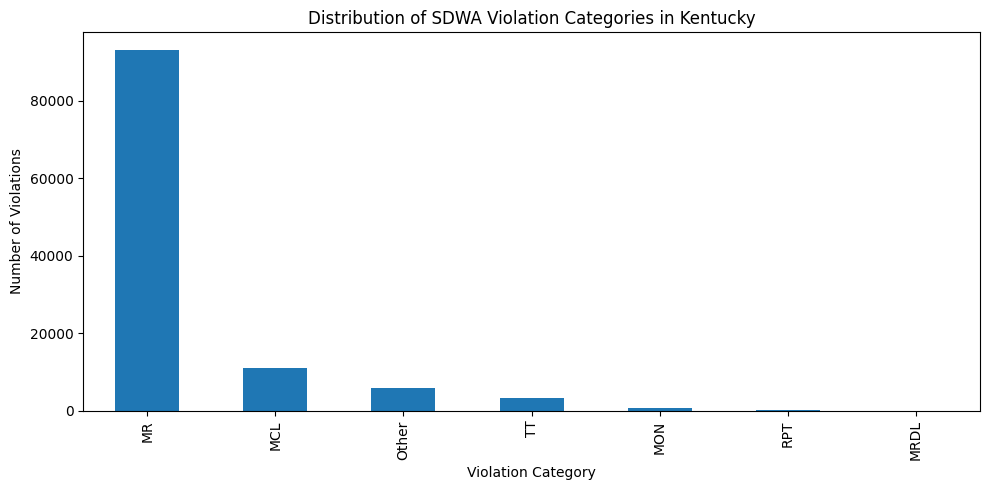

<Figure size 640x480 with 0 Axes>

In [33]:
import matplotlib.pyplot as plt

violation_counts.plot(kind="bar", figsize=(10, 5))
plt.title("Distribution of SDWA Violation Categories in Kentucky")
plt.xlabel("Violation Category")
plt.ylabel("Number of Violations")
plt.tight_layout()
plt.show()

plt.savefig(plots_dir / "violation_distribution.png")


This chart shows us how unevenly violations are distributed across the categories. A few categories are responsible for almost all of the violations with one towering above the rest. 



## EDA Question 2: How many violations are health realted?

Health related violations versus non health related violations is a comparison that I want to make to see how they stack up. Might be useful for later analysis.


In [34]:
health_counts = violations["is_health_based"].value_counts(dropna=False)
health_counts


is_health_based
N      99544
NaN    20496
Y      14476
Name: count, dtype: int64

I made a bar graph to show the comparison for these violations.

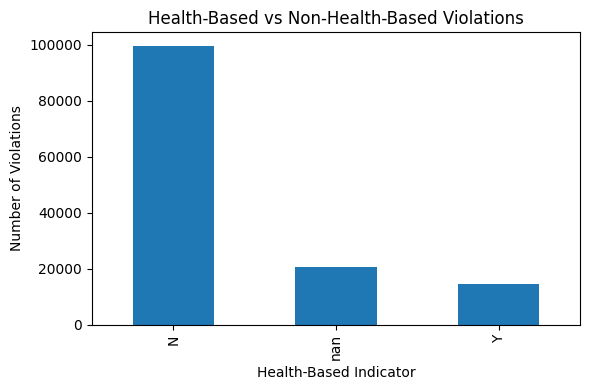

<Figure size 640x480 with 0 Axes>

In [35]:
health_counts.plot(kind="bar", figsize=(6, 4))
plt.title("Health-Based vs Non-Health-Based Violations")
plt.xlabel("Health-Based Indicator")
plt.ylabel("Number of Violations")
plt.tight_layout()
plt.show()

plt.savefig(plots_dir / "health_based_violations.png")

Most violations are not health related, but there are still plenty that are and I may dig deeper on those later.


## EDA Question 3: How have violations changed over time?

I examined violations by year using the non-compliance begin date to see if violations have increased or decreased over time.


I had to create a new column for year so I could pull violations by year.

In [36]:
violations["year"] = violations["noncompl_begin"].dt.year


In [37]:
violations_by_year = (
    violations
    .groupby("year")
    .size()
    .sort_index()
)

violations_by_year


year
1978.0       93
1979.0      428
1980.0       29
1981.0       38
1982.0       91
1983.0       88
1984.0      105
1985.0      469
1986.0      274
1987.0      237
1988.0      526
1989.0      344
1990.0      113
1991.0      405
1992.0      321
1993.0    15118
1994.0     4340
1995.0     4117
1996.0    23571
1997.0     2598
1998.0     3854
1999.0     7371
2000.0     1064
2001.0     1415
2002.0     7220
2003.0     2346
2004.0     2301
2005.0     4066
2006.0     2502
2007.0     2944
2008.0     2426
2009.0     2002
2010.0     1795
2011.0     1803
2012.0     1675
2013.0     1726
2014.0     2426
2015.0     2575
2016.0     2279
2017.0     1852
2018.0     1273
2019.0      587
2020.0     1226
2021.0      356
2022.0      486
2023.0      414
2024.0      580
2025.0      151
dtype: int64

Made a line graph to show the SDWA Violations in Kentucky Over Time.

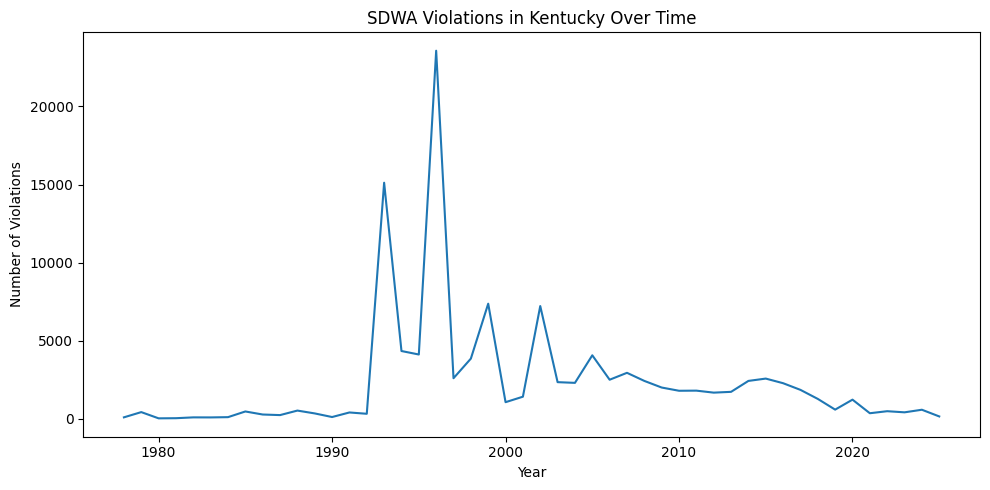

<Figure size 640x480 with 0 Axes>

In [38]:
violations_by_year.plot(kind="line", figsize=(10, 5))
plt.title("SDWA Violations in Kentucky Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Violations")
plt.tight_layout()
plt.show()

plt.savefig(plots_dir / "violation_over_time.png")


This line chart shows how violations fluctuate over time. While some variation is expected due to data availability, the overall pattern helps identify periods of time that may deserve a closer look.


## EDA Question 4: How severe are the violations?

To better understand how severe SDWA violations tend to be, I examined the distribution of the `SEVERITY_IND_CNT` variable. This helps show whether most violations are minor or if higher severity violations occur more ofter. I used a Histogram to show this.


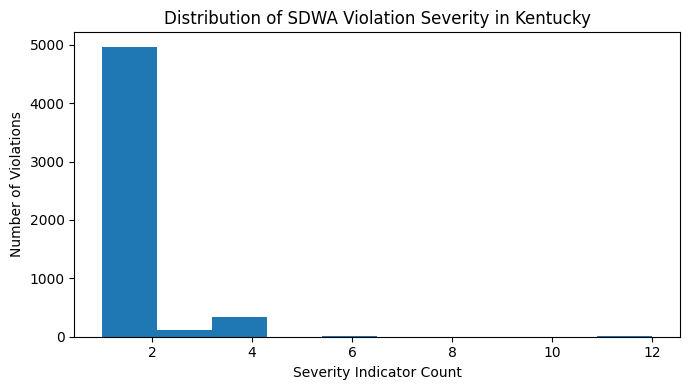

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 4))
violations["SEVERITY_IND_CNT"].dropna().plot(kind="hist", bins=10)
plt.title("Distribution of SDWA Violation Severity in Kentucky")
plt.xlabel("Severity Indicator Count")
plt.ylabel("Number of Violations")
plt.tight_layout()

plt.savefig(plots_dir / "severity_distribution.png")
plt.show()


### Observation

Most violations fall at the lower end of the severity scale, with few violations showing very high severity counts. This tells us that while severe violations do occur, the majority of SDWA violations in Kentucky tend to be less severe. This distribution will be useful later when evaluating which contaminants may pose greater risks to public health.


### Severity of Violations by Health-Based Status

To see if health based violations tend to be more severe, I compared the distribution of violation severity for health based and non health based violations using a boxplot. This helps highlight differences in spread, typical severity levels, and potential outliers.


C:\Users\opiej\AppData\Local\Temp\ipykernel_6760\1238001540.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(severity_by_health, labels=["Non-Health-Based", "Health-Based"])


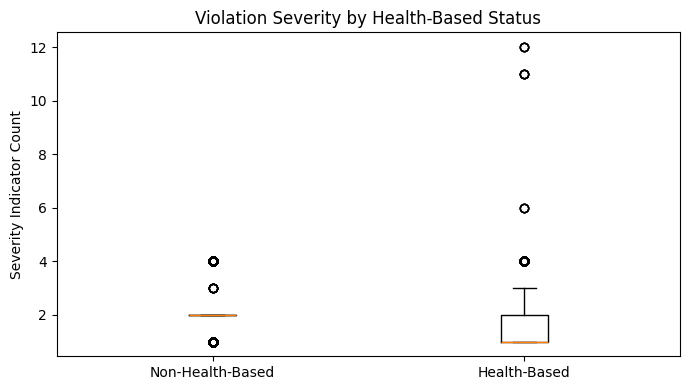

In [40]:
import matplotlib.pyplot as plt

# Prepare data for boxplot
severity_by_health = [
    violations.loc[violations["is_health_based"] == "N", "SEVERITY_IND_CNT"].dropna(),
    violations.loc[violations["is_health_based"] == "Y", "SEVERITY_IND_CNT"].dropna()
]

plt.figure(figsize=(7, 4))
plt.boxplot(severity_by_health, labels=["Non-Health-Based", "Health-Based"])
plt.title("Violation Severity by Health-Based Status")
plt.ylabel("Severity Indicator Count")
plt.tight_layout()

plt.savefig(plots_dir / "severity_by_health_boxplot.png")
plt.show()


### Observation

Health based violations tend to show a slightly higher spread in severity compared to non health based violations. While many violations in both groups have lower severity counts, the presence of higher outliers among healthbased violations suggests that when these violations occur, they may represent a more serious violation or risk to the public.


## Emerging Analysis Question

Based on the EDA I've done so far, the main question for this project is:

**Which contaminants appear most frequently in Kentucky drinking water violations?**


The next steps will involve linking violations to contaminants and looking at their potential impact on public health.


## Week 2 Summary

During Week 2, I focused on expanding my understanding of Kentucky’s SDWA violation data through exploratory data analysis and early visualizations.

I continued cleaning and prepping the data by confirming data types, handling missing values and verifying that only Kentucky public water system records were included. This ensured that all analysis moving forward is based on relevant and reliable data.

Using EDA techniques, I explored violation categories, health-based indicators, severity levels, and changes over time. Grouping, sorting and summary tables helped highlight patterns such as the high frequency of monitoring and reporting violations and the smaller but important subset of health based violations.

I created multiple visualizations to support this exploration, including bar charts for comparison, a line chart to examine trends over time, and distribution plots (histogram and boxplot) to better understand severity patterns. These visuals helped clarify where violations are concentrated and how severity differs between health-based and non-health-based violations.

This exploratory work helped shape the project’s direction and led to a focused analysis question centered on contaminants, their frequency, and their potential impact on public health. The next phase of the project will build on this foundation by linking violations to specific contaminants and evaluating health risks more directly.


# Keystone Project — Week 4
## Advanced Visualizations + Visual Integrity (Polished Charts)


## Data Integrity Notes

This week is about improving my charts using principles of visual integrity such as:

- making sure that titles and labels are clear
- making sure that my plots don't exaggerate 
- making sure that it is readable instead of telling
- making sure to add notes for context


**What this dataset represents**
- This data is pulled from actual records from the Kentucky public watersystems. The data used so far represents *violations and enforcement actions*. It is not data representing lab results for every water sample from every water system.
- A "violation" can include Monitoring/Reporting (MR) issues that can be a break in process or procedure and may not represent a contaminant type violation.

**Bias or misrepresentation possiblities**
- Water systems that test/report more often could have more violations simply because more data exists.
- Some systems may be underreported or be behind in reporting.
- Some fields are missing for most records in the dataset because they only apply to certain violation types.

**How to keep charts from misleading**
- Make sure that counts respresent violations correctly and not making the watersystems that do report seem to have more violations because they have more data.
- Making sure that the axes are set correctly so that any difference are not exaggerated and seem more dramatic than accurate.
- Making sure to show full range within a category and not just choosing the part that makes my story more dramatic. 

**How to reduce misleading interpretations**
- Use full y-axis baselines starting at 0 for bar charts.
- Clearly label what each chart measures.
- Include notes about what a violation does *and does not* mean.



Made a function to save my plots easier.

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

plots_dir = Path("plots")
plots_dir.mkdir(exist_ok=True)

def save_plot(filename):
    plt.tight_layout()
    plt.savefig(plots_dir / filename, dpi=300, bbox_inches="tight")


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

project_root = Path("..")
data_folder = project_root / "datasets" / "SDWA_ky"

violations = pd.read_csv(data_folder / "ky_violations_enforcement.csv", low_memory=False)
systems    = pd.read_csv(data_folder / "ky_pub_water_systems.csv", low_memory=False)
codes      = pd.read_csv(data_folder / "ref_contaminant_codes.csv", low_memory=False)
violations = violations.rename(columns={
    "NON_COMPL_PER_BEGIN_DATE": "noncompl_begin",
    "NON_COMPL_PER_END_DATE": "noncompl_end",
    "VIOLATION_CATEGORY_CODE": "violation_category",
    "IS_HEALTH_BASED_IND": "is_health_based",
    "CONTAMINANT_CODE": "contaminant_code",
    "PWSID": "pwsid"
})

violations["noncompl_begin"] = pd.to_datetime(violations["noncompl_begin"], errors="coerce")
violations["noncompl_end"]   = pd.to_datetime(violations["noncompl_end"], errors="coerce")

violations = violations[violations["pwsid"].astype(str).str.startswith("KY")].copy()

violations.shape

violations.head()

,SUBMISSIONYEARQUARTER,pwsid,VIOLATION_ID,FACILITY_ID,COMPL_PER_BEGIN_DATE,COMPL_PER_END_DATE,noncompl_begin,noncompl_end,PWS_DEACTIVATION_DATE,VIOLATION_CODE,...,RULE_FAMILY_CODE,VIOL_FIRST_REPORTED_DATE,VIOL_LAST_REPORTED_DATE,ENFORCEMENT_ID,ENFORCEMENT_DATE,ENFORCEMENT_ACTION_TYPE_CODE,ENF_ACTION_CATEGORY,ENF_ORIGINATOR_CODE,ENF_FIRST_REPORTED_DATE,ENF_LAST_REPORTED_DATE
186,2025Q3,KY0010082,6244803,NaN,07/01/2003,09/30/2003,2003-07-01,2003-09-30,08/10/2010,02,...,230.0,09/30/2005,08/16/2018,403,12/10/2003,SIF,Informal,S,11/30/2004,08/16/2018
187,2025Q3,KY0010082,6244803,NaN,07/01/2003,09/30/2003,2003-07-01,2003-09-30,08/10/2010,02,...,230.0,09/30/2005,08/16/2018,503,10/31/2003,SIE,Informal,S,11/30/2004,08/16/2018
188,2025Q3,KY0010082,6244803,NaN,07/01/2003,09/30/2003,2003-07-01,2003-09-30,08/10/2010,02,...,230.0,09/30/2005,08/16/2018,603,10/31/2003,SFJ,Informal,S,11/30/2004,08/16/2018
189,2025Q3,KY0010082,6244803,NaN,07/01/2003,09/30/2003,2003-07-01,2003-09-30,08/10/2010,02,...,230.0,09/30/2005,08/16/2018,9411,12/07/2006,SOX,Resolving,S,05/10/2007,07/01/2020
190,2025Q3,KY0010082,6469304,NaN,01/01/2004,03/31/2004,2004-01-01,2004-03-31,08/10/2010,02,...,210.0,03/23/2005,08/16/2018,1404,05/27/2004,SFJ,Informal,S,11/30/2004,07/01/2020


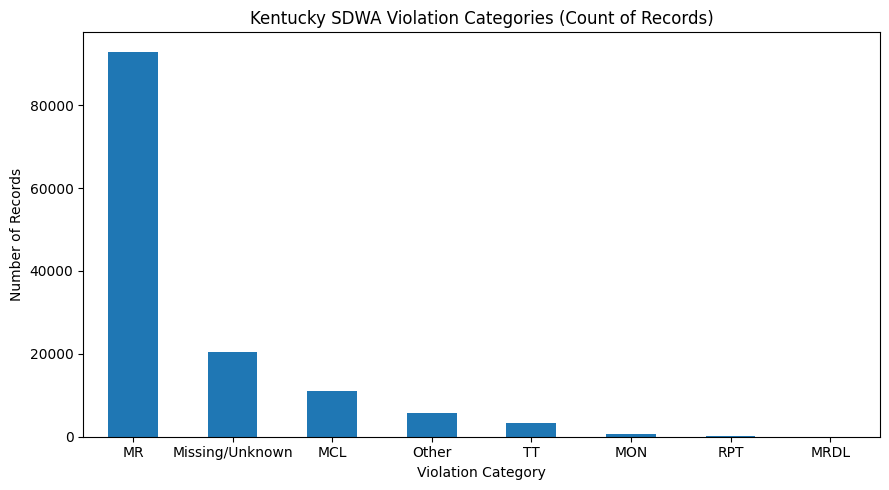

In [44]:

cat = violations["violation_category"].fillna("Missing/Unknown")

counts = cat.value_counts().sort_values(ascending=False)

plt.figure(figsize=(9, 5))
counts.plot(kind="bar")
plt.title("Kentucky SDWA Violation Categories (Count of Records)")
plt.xlabel("Violation Category")
plt.ylabel("Number of Records")
plt.xticks(rotation=0)

save_plot("week4_polished_bar_violation_categories.png")
plt.show()


**Violation Category Key (EPA SDWA codes)**
- MR = Monitoring & Reporting  
- MCL = Maximum Contaminant Level  
- TT = Treatment Technique  
- MON = Monitoring  
- RPT = Reporting  
- Other = Other/uncategorized  
- Missing/Unknown = Not provided in record


**Data Source**

EPA Safe Drinking Water Act (SDWA) — Violations and Enforcement data (Kentucky-only extract created from the national SDWA download).
This project uses:

ky_violations_enforcement.csv

ky_pub_water_systems.csv

ref_contaminant_codes.csv

### Chart 1 (Comparison): SDWA Violation Categories

**Question:** Which SDWA violation categories occur most often in Kentucky?

**Why this chart type:** A bar chart is best for comparing counts across categories.

**Design choices:**  
- Kept category order sorted by frequency
- Used a readable figure size and labels  
- Did not truncate the y-axis (starts at 0) to avoid exaggerating differences  

**Visual integrity / limitations:**  
- “Missing/Unknown” means the category code was not present in the dataset which may be due to lack of reporting rather than no data.


I added a pie chart on this one too. I know that they can be skewed and are not the best choice, but I like to see percentages represented that way. 

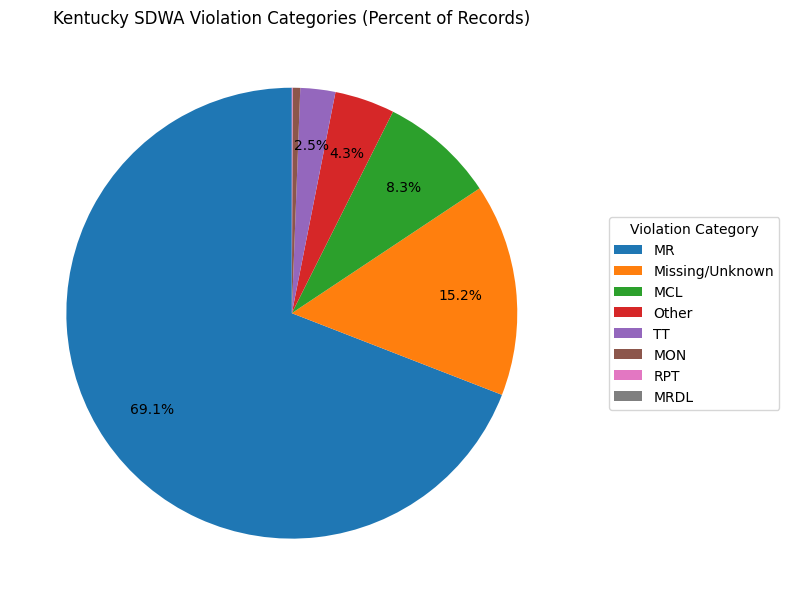

In [46]:
import matplotlib.pyplot as plt

def autopct_threshold(pct, threshold=1.0):
    return f"{pct:.1f}%" if pct >= threshold else ""

plt.figure(figsize=(8,8))
category_pct.plot(
    kind="pie",
    startangle=90,
    labels=None,
    autopct=lambda pct: autopct_threshold(pct, threshold=1.0),  
    pctdistance=0.75
)

plt.title("Kentucky SDWA Violation Categories (Percent of Records)")
plt.ylabel("")

plt.legend(
    category_pct.index,
    title="Violation Category",
    loc="center left",
    bbox_to_anchor=(1.05, 0.5)
)

save_plot("polished_pie_violation_categories_percent.png")
plt.show()


*“Slices < 1% not labeled.”*

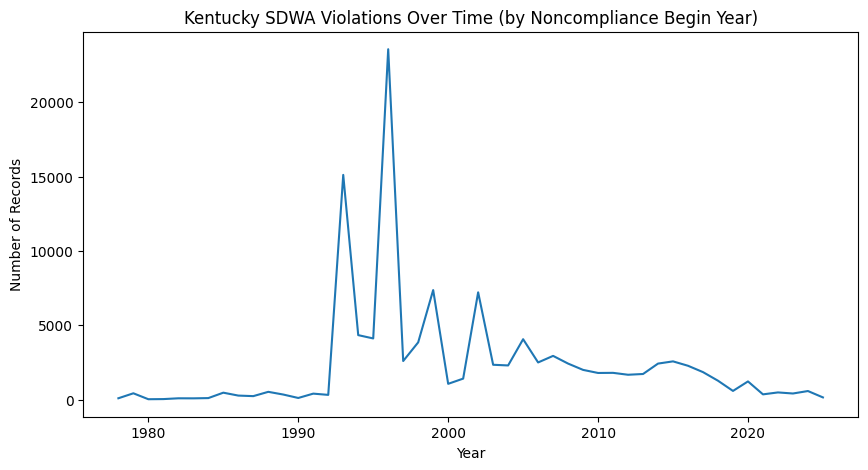

In [47]:

violations["year"] = violations["noncompl_begin"].dt.year


trend = (
    violations.dropna(subset=["year"])
    .groupby("year")
    .size()
    .sort_index()
)

plt.figure(figsize=(10, 5))
trend.plot(kind="line")
plt.title("Kentucky SDWA Violations Over Time (by Noncompliance Begin Year)")
plt.xlabel("Year")
plt.ylabel("Number of Records")

plt.show()


### Chart 2 (Pattern): Violations Over Time

**Question:** How have SDWA violation records changed over time in Kentucky?

**Why this chart type:** A line chart helps show trends over time.

**Design choices:**  
- Used year on the x-axis and count of records on the y-axis  
- Kept the axis scale honest and readable  
- Dropped rows with missing year 

**Visual integrity / limitations:**  
- This is based on **noncompliance begin date**, not “date discovered” or “date resolved.”  



<Figure size 900x500 with 0 Axes>

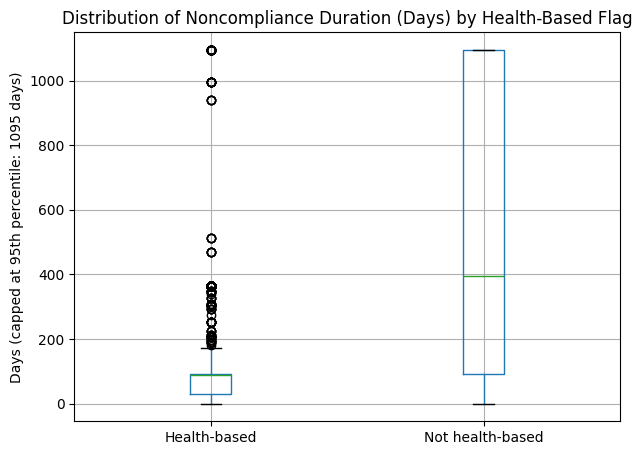

In [53]:
import numpy as np



tmp = violations.dropna(subset=["noncompl_begin", "noncompl_end"]).copy()
tmp["duration_days"] = (tmp["noncompl_end"] - tmp["noncompl_begin"]).dt.days


tmp = tmp[tmp["duration_days"] >= 0].copy()


cap = tmp["duration_days"].quantile(0.95)
tmp_plot = tmp[tmp["duration_days"] <= cap].copy()


tmp_plot.loc[:, "health_label"] = (
    tmp_plot["is_health_based"]
    .fillna("Missing/Unknown")
    .replace({"Y": "Health-based", "N": "Not health-based"})
)

plt.figure(figsize=(9, 5))
tmp_plot.boxplot(column="duration_days", by="health_label")

plt.title("Distribution of Noncompliance Duration (Days) by Health-Based Flag")
plt.suptitle("")  
plt.xlabel("")
plt.ylabel(f"Days (capped at 95th percentile: {int(cap)} days)")

save_plot("week4_boxplot_duration_by_health.png")
plt.show()


### Chart 3 Boxplot (Distribution): Noncompliance Duration

- **Question this chart helps answer:** Do health based violations tend to have longer noncompliance durations than non health based violations?
- **Why this chart type is appropriate:** A **boxplot** shows the **distribution** of the data and makes it easy to compare groups side by side.
- **Design choices I made:**  
  - Grouped the boxplot by the health based flag so the categories are directly comparable.  
  - Capped duration at the **95th percentile** to keep extreme outliers from compressing the rest of the data and making the chart unreadable.  
  - Used clear titles and axis labels so the meaning is obvious to someone unfamiliar with the dataset.
- **How I ensured accuracy and avoided misleading design (visual integrity / ethics):**  
  - I **explicitly labeled** that durations are **capped at the 95th percentile** so the chart is not misleading.  
  - I removed records missing begin/end dates because duration cannot be calculated for those rows.  
  - I did not truncate the axis to exaggerate differences—this chart is meant to show distribution honestly, not to “prove” a point.
- **What this chart suggests:** If the health based group has a higher median and wider spread, it may indicate health based violations often remain unresolved longer which can have a potential public health impact.


In [57]:
violations.columns

Index(['SUBMISSIONYEARQUARTER', 'pwsid', 'VIOLATION_ID', 'FACILITY_ID',
       'COMPL_PER_BEGIN_DATE', 'COMPL_PER_END_DATE', 'noncompl_begin',
       'noncompl_end', 'PWS_DEACTIVATION_DATE', 'VIOLATION_CODE',
       'violation_category', 'is_health_based', 'contaminant_code',
       'VIOL_MEASURE', 'UNIT_OF_MEASURE', 'FEDERAL_MCL', 'STATE_MCL',
       'IS_MAJOR_VIOL_IND', 'SEVERITY_IND_CNT', 'CALCULATED_RTC_DATE',
       'VIOLATION_STATUS', 'PUBLIC_NOTIFICATION_TIER',
       'CALCULATED_PUB_NOTIF_TIER', 'VIOL_ORIGINATOR_CODE', 'SAMPLE_RESULT_ID',
       'CORRECTIVE_ACTION_ID', 'RULE_CODE', 'RULE_GROUP_CODE',
       'RULE_FAMILY_CODE', 'VIOL_FIRST_REPORTED_DATE',
       'VIOL_LAST_REPORTED_DATE', 'ENFORCEMENT_ID', 'ENFORCEMENT_DATE',
       'ENFORCEMENT_ACTION_TYPE_CODE', 'ENF_ACTION_CATEGORY',
       'ENF_ORIGINATOR_CODE', 'ENF_FIRST_REPORTED_DATE',
       'ENF_LAST_REPORTED_DATE', 'year', 'duration_days'],
      dtype='object')

In [58]:
codes.columns

Index(['VALUE_TYPE', 'VALUE_CODE', 'VALUE_DESCRIPTION'], dtype='object')

In [59]:
violations["contaminant_code"].head()


186    2456.0
187    2456.0
188    2456.0
189    2456.0
190    2456.0
Name: contaminant_code, dtype: object

## EDA Question: What contaminants show up in Kentucky violations and how often?

The violations dataset had a `contaminant_code` category, but the codes are numbers not the actual contaminant.  

This means to see what is in the water, I will have to:

- Use the EPA reference table (`ref_contaminant_codes.csv`) to cross reference contaminant codes into then contaminant name.
- See how often each contaminant is in the Kentucky violation records
- Compare which contaminants show up most often in *health based* violations (flagged with `is_health_based == "Y"`)

**Note:** A contaminant appearing in the violations dataset does not automatically mean drinking water was unsafe.  
This dataset tracks violations and compliance events and using the EPA “health based” flag as one indicator for potential public health relevance.


In [60]:

contam_lookup = (
    codes[codes["VALUE_TYPE"].eq("CONTAMINANT_CODE")]
    .loc[:, ["VALUE_CODE", "VALUE_DESCRIPTION"]]
    .rename(columns={
        "VALUE_CODE": "contaminant_code",
        "VALUE_DESCRIPTION": "contaminant_name"
    })
)


violations["contaminant_code"] = pd.to_numeric(violations["contaminant_code"], errors="coerce").astype("Int64")
contam_lookup["contaminant_code"] = pd.to_numeric(contam_lookup["contaminant_code"], errors="coerce").astype("Int64")


v_contam = violations.merge(contam_lookup, on="contaminant_code", how="left")


v_contam[["contaminant_code", "contaminant_name"]].head(10)


,contaminant_code,contaminant_name
0,2456,Total Haloacetic Acids (HAA5)
1,2456,Total Haloacetic Acids (HAA5)
2,2456,Total Haloacetic Acids (HAA5)
3,2456,Total Haloacetic Acids (HAA5)
4,2456,Total Haloacetic Acids (HAA5)
5,2456,Total Haloacetic Acids (HAA5)
6,2456,Total Haloacetic Acids (HAA5)
7,2456,Total Haloacetic Acids (HAA5)
8,200,Surface Water Treatment Rule
9,200,Surface Water Treatment Rule


In [61]:
print("Total violation rows:", len(v_contam))
print("Rows with a contaminant code:", v_contam["contaminant_code"].notna().sum())
print("Rows with a contaminant name after merge:", v_contam["contaminant_name"].notna().sum())



Total violation rows: 503462
Rows with a contaminant code: 114019
Rows with a contaminant name after merge: 503462


In [62]:
v_contam.loc[
    v_contam["contaminant_code"].notna() & v_contam["contaminant_name"].isna(),
    ["contaminant_code"]
].drop_duplicates().head(10)


,contaminant_code


### Contaminants by frequency (all violation records)

Next I want to see how often the contaminant names appear Kentucky’s violation records.  
This will show which contaminants are most frequently associated with violations in the dataset.


In [63]:
top_contaminants = (
    v_contam.dropna(subset=["contaminant_name"])
    .groupby("contaminant_name")
    .size()
    .sort_values(ascending=False)
    .head(15)
)
top_contaminants


contaminant_name
#2 FUEL OIL                          20497
36 Unregulated Phase I VOCs          20497
#4 FUEL OIL                          20497
Jet Fuel                             20497
LEAD SUMMARY                         20497
Motor Oil                            20497
Not applicable                       20497
Propane                              20497
COPPER SUMMARY                       20497
Submersible Pump Oil                 20497
ALL NIPDWR ORGANIC CONTAMINANTS      20497
ALL NIPDWR INORGANIC CONTAMINANTS    20497
8 Regulated Phase I VOCs             20497
7 Regulated Phase I VOCs             20497
Gasoline                             20497
dtype: int64

### Contaminants in health-based violations only

To focus on potential public health relevance, I filtered to violations marked as health based (`is_health_based == "Y"`).  
This helps narrow the list to cases that are more directly tied to health standards.


In [64]:
top_health_contaminants = (
    v_contam[v_contam["is_health_based"].eq("Y")]
    .dropna(subset=["contaminant_name"])
    .groupby("contaminant_name")
    .size()
    .sort_values(ascending=False)
    .head(15)
)
top_health_contaminants


contaminant_name
Total Haloacetic Acids (HAA5)                    4403
TTHM                                             4077
Coliform (TCR)                                   1886
Surface Water Treatment Rule                     1492
CARBON, TOTAL                                    1080
Interim Enhanced Surface Water Treatment Rule     548
Revised Total Coliform Rule                       164
Nitrate                                           137
Barium                                            117
Thallium, Total                                    82
Cadmium                                            69
Antimony, Total                                    65
Groundwater Rule                                   54
Asbestos                                           50
Trichloroethylene                                  40
dtype: int64

In [65]:
contam_health_pct = (
    v_contam.dropna(subset=["contaminant_name"])
    .assign(is_health=v_contam["is_health_based"].eq("Y"))
    .groupby("contaminant_name")["is_health"]
    .mean()
    .mul(100)
    .sort_values(ascending=False)
    .head(15)
)

contam_health_pct


contaminant_name
Stage 1 Disinfectants and Disinfection Byproducts Rule    100.000000
Chlorine dioxide                                          100.000000
Total Haloacetic Acids (HAA5)                              71.315193
TTHM                                                       69.967393
CARBON, TOTAL                                              56.485356
Interim Enhanced Surface Water Treatment Rule              40.865026
LEAD AND COPPER RULE REVISIONS                             38.636364
Surface Water Treatment Rule                               28.555024
Long Term 2 Enhanced Surface Water Treatment Rule          19.553073
Revised Total Coliform Rule                                17.943107
Coliform (TCR)                                             12.961309
Groundwater Rule                                           11.464968
Barium                                                     11.121673
Thallium, Total                                             9.669811
Antimony, Total  

In [67]:
top_contaminants.head(10)


contaminant_name
#2 FUEL OIL                    20497
36 Unregulated Phase I VOCs    20497
#4 FUEL OIL                    20497
Jet Fuel                       20497
LEAD SUMMARY                   20497
Motor Oil                      20497
Not applicable                 20497
Propane                        20497
COPPER SUMMARY                 20497
Submersible Pump Oil           20497
dtype: int64

In [68]:
top_health_contaminants.head(10)

contaminant_name
Total Haloacetic Acids (HAA5)                    4403
TTHM                                             4077
Coliform (TCR)                                   1886
Surface Water Treatment Rule                     1492
CARBON, TOTAL                                    1080
Interim Enhanced Surface Water Treatment Rule     548
Revised Total Coliform Rule                       164
Nitrate                                           137
Barium                                            117
Thallium, Total                                    82
dtype: int64

In [69]:
v_contam["contaminant_name"].value_counts(dropna=False).head(20)


contaminant_name
ALL NIPDWR INORGANIC CONTAMINANTS    20497
COPPER SUMMARY                       20497
LEAD SUMMARY                         20497
Gasoline                             20497
#2 FUEL OIL                          20497
Jet Fuel                             20497
#4 FUEL OIL                          20497
#5 FUEL OIL                          20497
Motor Oil                            20497
Submersible Pump Oil                 20497
VARSOL                               20497
Propane                              20497
15 Unregulated Phase I VOCs          20497
34 Unregulated Phase I VOCs          20497
36 Unregulated Phase I VOCs          20497
7 Regulated Phase I VOCs             20497
8 Regulated Phase I VOCs             20497
ALL NIPDWR ORGANIC CONTAMINANTS      20497
Not applicable                       20497
Coliform (TCR)                       14551
Name: count, dtype: int64

In [70]:
bad_names = {
    "Not applicable",
    "LEAD SUMMARY",
    "COPPER SUMMARY",
    "Jet Fuel",
    "Motor Oil",
    "Submersible Pump Oil",
    "Propane",
    "#2 FUEL OIL",
    "#4 FUEL OIL",
    "Unregulated Phase I VOCs",
}

v_contam_clean = v_contam[
    v_contam["contaminant_code"].notna()
    & v_contam["contaminant_name"].notna()
    & ~v_contam["contaminant_name"].isin(bad_names)
].copy()

v_contam_clean["contaminant_name"].value_counts().head(15)


contaminant_name
Coliform (TCR)                                   14551
Total Haloacetic Acids (HAA5)                     6174
TTHM                                              5827
Surface Water Treatment Rule                      5225
Nitrate                                           4814
Consumer Confidence Rule                          3768
Lead and Copper Rule                              3110
Public Notice                                     1966
CARBON, TOTAL                                     1912
Asbestos                                          1386
Interim Enhanced Surface Water Treatment Rule     1341
Trichloroethylene                                 1341
p-Dichlorobenzene                                 1234
Vinyl chloride                                    1233
1,1,1-Trichloroethane                             1231
Name: count, dtype: int64

In [71]:
contam_summary = (
    v_contam_clean
    .assign(is_health=v_contam_clean["is_health_based"].eq("Y"))
    .groupby("contaminant_name")
    .agg(
        total_violations=("contaminant_name", "size"),
        health_based_violations=("is_health", "sum"),
        pct_health_based=("is_health", "mean"),
    )
    .sort_values("total_violations", ascending=False)
)

contam_summary["pct_health_based"] = (contam_summary["pct_health_based"] * 100).round(1)

contam_summary.head(15)


,total_violations,health_based_violations,pct_health_based
contaminant_name,,,
Coliform (TCR),14551,1886,13.0
Total Haloacetic Acids (HAA5),6174,4403,71.3
TTHM,5827,4077,70.0
Surface Water Treatment Rule,5225,1492,28.6
Nitrate,4814,137,2.8
Consumer Confidence Rule,3768,0,0.0
Lead and Copper Rule,3110,0,0.0
Public Notice,1966,0,0.0
"CARBON, TOTAL",1912,1080,56.5


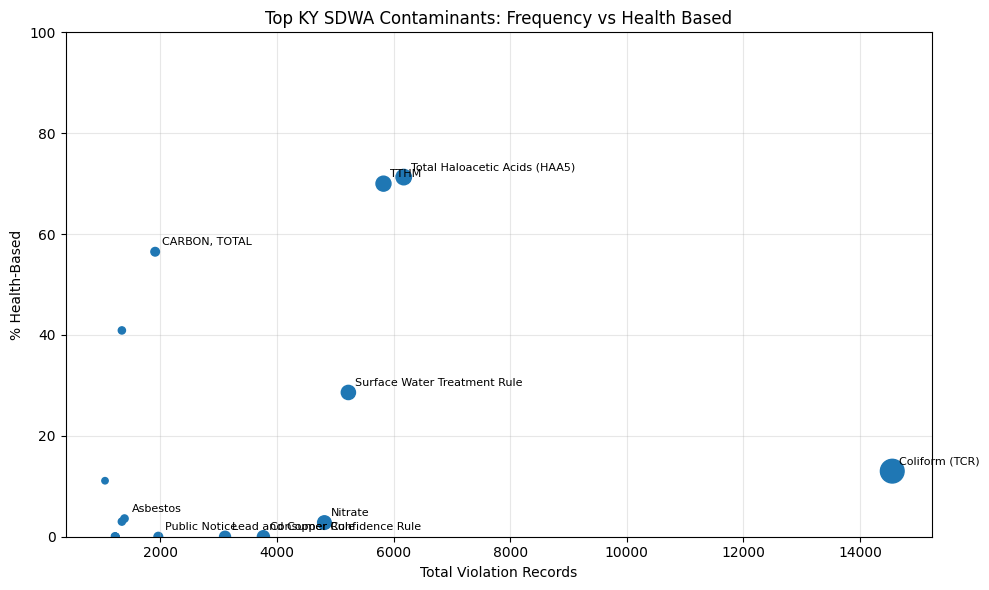

In [ ]:
topN = 20
plot_df = contam_summary.head(topN).reset_index()

plt.figure(figsize=(10,6))
plt.scatter(plot_df["total_violations"], plot_df["pct_health_based"],s=plot_df["total_violations"]/50)

plt.title("Top KY SDWA Contaminants: Frequency vs Health Based")
plt.xlabel("Total Violation Records")
plt.ylabel("% Health Based")
plt.ylim(0, 100)
plt.grid(True, alpha=0.3)


for _, r in plot_df.head(10).iterrows():
    x = r["total_violations"]
    y = r["pct_health_based"]
    plt.annotate(
        r["contaminant_name"],
        (x, y),
        xytext=(5, 5), 
        textcoords="offset points",
        fontsize=8
    )
save_plot("scatter_top_contaminants_health_vs_freq.png")

plt.tight_layout()
plt.show()



In [74]:
contam_summary

,total_violations,health_based_violations,pct_health_based
contaminant_name,,,
Coliform (TCR),14551,1886,13.0
Total Haloacetic Acids (HAA5),6174,4403,71.3
TTHM,5827,4077,70.0
Surface Water Treatment Rule,5225,1492,28.6
Nitrate,4814,137,2.8
...,...,...,...
Radium-228,22,0,0.0
Chlorite,16,0,0.0
Stage 1 Disinfectants and Disinfection Byproducts Rule,14,14,100.0


### Polished Visual: Frequency vs. Health Based by Contaminant (Scatterplot)

**Question this chart helps answer:**  
Which contaminants show up most often in Kentucky SDWA violation records and which contaminants have a higher share of health based violations?

**Why this chart type is appropriate:**  
A scatterplot is a good choice because it can show a relationship or a pattern between two numeric measures at the same time:
- **X-axis:** total number of violation records for each contaminant 
- **Y-axis:** percent of that contaminant’s records that are flagged as health based 

This lets me see which contaminants are both common and frequently health based and which contaminants are common but not often health based. This helps weed out the actual contaminants from all the monitoring and reporting violations that are likely procedural or clerical.

**What the chart shows:**
- **Coliform (TCR)** is the contaminant with the most violations in the dataset, but only about **13%** of those records are marked healthbased.
- **TTHM** and **Total Haloacetic Acids (HAA5)** stand out because they have a high health based percent (~70%) and they show up often in the data.
- Some itemslike *Consumer Confidence Rule* or *Public Notice* may have a 0% health-based share because they are generally reporting/administrative compliance categories in the dataset.

**Design choices for clarity and integrity:**
- I labeled the axis with the two things that are being compared and gave a descriptive title so a reader knows what they are looking at.
- I labeled only a limited number of items so the chart doesn't get too cluttered.
- I used the full axis (no truncation) to avoid exaggerating differences.

**Ethics:**
“Health based” in this dataset means the record is flagged as health based. It does not provide measurements or levels of contaminants and it does not prove illness.
Some “contaminant_name” entries are actually rules/programs (“Public Notice”, “Consumer Confidence Rule”) not chemicals.

**Data source:**  
EPA Safe Drinking Water Act (SDWA) Violations and Enforcement dataset (filtered for Kentucky public water systems);
EPA reference contaminant codes for contaminant names
